In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import os
os.getcwd()

'C:\\Users\\shari\\OneDrive\\Desktop\\Shahram_Space X'

In [15]:
df= pd.read_csv('dataset_falcon9.csv')

In [16]:
df.info()
#df_num=FlightNumber,PayloadMass

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     int64  
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [17]:
df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
3,4,9/29/2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1,0,B1003,-120.610829,34.632093,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0


In [18]:
df['BoosterVersion'].unique()

array(['Falcon 9'], dtype=object)

In [19]:
df['LaunchSite'].unique()

array(['CCAFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A'], dtype=object)

In [20]:
df[df['LaunchSite'].str.startswith('CCA')].head(5)

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,6/4/2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0003,-80.577366,28.561857,0
1,2,5/22/2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0005,-80.577366,28.561857,0
2,3,3/1/2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B0007,-80.577366,28.561857,0
4,5,12/3/2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1004,-80.577366,28.561857,0
5,6,1/6/2014,Falcon 9,3325.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1,0,B1005,-80.577366,28.561857,0


In [21]:
total_payload_nasa = df[df['BoosterVersion'] == 'NASA']['PayloadMass'].sum()
print("Total payload carried by NASA boosters:", total_payload_nasa)

Total payload carried by NASA boosters: 0.0


In [22]:
total_payload_nasa = df[df['BoosterVersion'] == 'Falcon 9']['PayloadMass'].sum()
print("Total payload carried by NASA boosters:", total_payload_nasa)

Total payload carried by NASA boosters: 549446.3470600001


In [23]:
success_df = df[df['Class'] == 1]
success_landing_dates = success_df.groupby('LandingPad')['Date'].min()
print("Dates of the first successful landing pad outcomes:")
print(success_landing_dates)

Dates of the first successful landing pad outcomes:
LandingPad
5e9e3032383ecb267a34e7c7     1/8/2018
5e9e3032383ecb554034e7c9    10/8/2018
5e9e3032383ecb6bb234e7ca    1/29/2020
5e9e3033383ecbb9e534e7cc    1/11/2019
Name: Date, dtype: object


In [24]:
success_df = df[df['Class'] == 1]
success_landing_dates = success_df.groupby('LandingPad')['Date'].min()
print("Date of the first successful landing pad outcomes:", earliest_success_date)
print(success_landing_dates)

NameError: name 'earliest_success_date' is not defined

In [25]:
success_df = df[df['Class'] == 1]
success_landing_dates = success_df.groupby('LandingPad')['Date'].first()
print("First dates of successful landing pad outcomes:")
print(success_landing_dates)

First dates of successful landing pad outcomes:
LandingPad
5e9e3032383ecb267a34e7c7    12/22/2015
5e9e3032383ecb554034e7c9     10/8/2018
5e9e3032383ecb6bb234e7ca      4/8/2016
5e9e3033383ecbb9e534e7cc     1/14/2017
Name: Date, dtype: object


In [26]:
success_df = df[df['Class'] == 1]
earliest_success_date = success_df['Date'].min()
print("The earliest date of the first successful landing on any landing pad:", earliest_success_date)

The earliest date of the first successful landing on any landing pad: 1/11/2019


In [27]:
# Assuming 'df' is your DataFrame
max_payload = df['PayloadMass'].max()
boosters_with_max_payload = df[df['PayloadMass'] == max_payload]['BoosterVersion'].tolist()

print("Boosters that carried the maximum payload mass:")
for booster in boosters_with_max_payload:
    print(booster)


Boosters that carried the maximum payload mass:
Falcon 9
Falcon 9
Falcon 9


In [28]:
set(df['LaunchSite'])

{'CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'}

In [29]:
set(df['BoosterVersion'])

{'Falcon 9'}

In [31]:
df['Date']

0       6/4/2010
1      5/22/2012
2       3/1/2013
3      9/29/2013
4      12/3/2013
         ...    
85      9/3/2020
86     10/6/2020
87    10/18/2020
88    10/24/2020
89     11/5/2020
Name: Date, Length: 90, dtype: object

In [32]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter the DataFrame for dates with year 2015
dates_2015 = df[df['Date'].dt.year == 2015]

# Print the results
print("Dates from the year 2015:")
print(dates_2015)

Dates from the year 2015:
    FlightNumber       Date BoosterVersion  PayloadMass  Orbit    LaunchSite  \
11            12 2015-01-10       Falcon 9       2395.0    ISS  CCAFS SLC 40   
12            13 2015-02-11       Falcon 9        570.0  ES-L1  CCAFS SLC 40   
13            14 2015-04-14       Falcon 9       1898.0    ISS  CCAFS SLC 40   
14            15 2015-04-27       Falcon 9       4707.0    GTO  CCAFS SLC 40   
15            16 2015-06-28       Falcon 9       2477.0    ISS  CCAFS SLC 40   
16            17 2015-12-22       Falcon 9       2034.0    LEO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs                LandingPad  \
11  False ASDS        1      True   False   True  5e9e3032383ecb761634e7cb   
12  True Ocean        1      True   False   True                       NaN   
13  False ASDS        1      True   False   True  5e9e3032383ecb761634e7cb   
14   None None        1     False   False  False                       NaN   
15   None ASDS        1

In [35]:
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter the DataFrame for failed landing outcomes (Class 0) and the year 2015
failed_landings_2015 = df[(df['Class'] == 0) & (df['Date'].dt.year == 2015)]

# Print the results
for index, row in failed_landings_2015.iterrows():
    print("Booster Version:", row['BoosterVersion'])
    print("Launch Site:", row['LaunchSite'])
    print("------------------------------")

Booster Version: Falcon 9
Launch Site: CCAFS SLC 40
------------------------------
Booster Version: Falcon 9
Launch Site: CCAFS SLC 40
------------------------------
Booster Version: Falcon 9
Launch Site: CCAFS SLC 40
------------------------------
Booster Version: Falcon 9
Launch Site: CCAFS SLC 40
------------------------------


In [37]:

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

# Filter the DataFrame for the specified date range
start_date = '2010-06-04'
end_date = '2017-03-20'
filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Count the landing outcomes based on 'LandingPad', 'Class', and 'Date'
landing_outcome_counts = filtered_data.groupby(['LandingPad', 'Class'])['Class'].count()

# Sort the counts in descending order
sorted_counts = landing_outcome_counts.sort_values(ascending=False)

# Print the results
print("Ranking of landing outcomes between", start_date, "and", end_date, ":\n")
print(sorted_counts)


Ranking of landing outcomes between 2010-06-04 and 2017-03-20 :

LandingPad                Class
5e9e3032383ecb6bb234e7ca  1        4
5e9e3032383ecb267a34e7c7  1        3
5e9e3032383ecb6bb234e7ca  0        3
5e9e3032383ecb761634e7cb  0        2
5e9e3033383ecbb9e534e7cc  0        1
                          1        1
Name: Class, dtype: int64


In [55]:

# Find unique values in the 'BoosterVersion' column
unique_boosters = df['BoosterVersion'].unique()

# Filter the DataFrame for boosters with successful landing outcomes, payload mass between 4000 and 6000
filtered_boosters = df[(df['LandingPad'] == 'Success') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

# Count the occurrences of each booster
booster_counts = filtered_boosters['BoosterVersion'].value_counts()

# Print the number of unique boosters and the booster names along with their respective counts
print("Number of unique boosters:", len(unique_boosters))
print("\nCount of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:")
print(booster_counts)


Number of unique boosters: 1

Count of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:
Series([], Name: BoosterVersion, dtype: int64)


In [59]:


# Find unique values in the 'BoosterVersion' column
unique_boosters = df['BoosterVersion'].unique()

# Filter the DataFrame for boosters with successful landing outcomes, payload mass between 4000 and 6000
filtered_boosters = df[(df['LandingPad'] == 'Success') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

# Count the occurrences of each booster
booster_counts = filtered_boosters['BoosterVersion'].value_counts()

# Count the total number of boosters
total_boosters = len(unique_boosters)

# Print the number of unique boosters and the booster names along with their respective counts
print("Number of unique boosters:", total_boosters)
print("\nCount of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:")
print(booster_counts)

Number of unique boosters: 1

Count of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:
Series([], Name: BoosterVersion, dtype: int64)


In [62]:
total_unique_boosters = df['BoosterVersion'].nunique()

# Count the occurrences of each booster
booster_counts = df['BoosterVersion'].value_counts()

# Print the total number of unique boosters
print("Total number of unique boosters:", total_unique_boosters)

# Print the booster names along with their respective counts
print("\nCount of each booster:")
print(booster_counts)

Total number of unique boosters: 1

Count of each booster:
Falcon 9    90
Name: BoosterVersion, dtype: int64


In [72]:
df["LaunchSite"].value_counts()

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

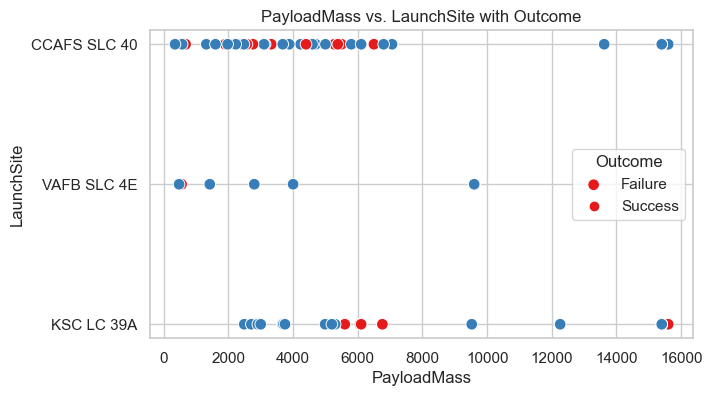

In [69]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# Create the scatter plot
sns.scatterplot(data=df, x="PayloadMass", y="LaunchSite", hue="Class", palette="Set1", s=70)

# Set labels and title
plt.xlabel("PayloadMass")
plt.ylabel("LaunchSite")
plt.title("PayloadMass vs. LaunchSite with Outcome")

# Display the legend
plt.legend(title="Outcome", labels=["Failure", "Success"])

# Show the plot
plt.show()

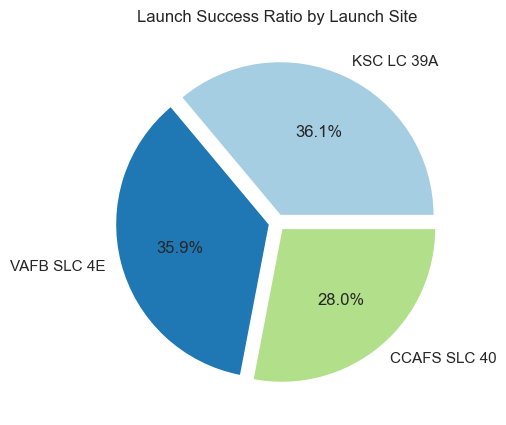

In [73]:
launch_site_success = df[df['Class'] == 1]['LaunchSite'].value_counts()
launch_site_total = df['LaunchSite'].value_counts()
launch_site_ratios = (launch_site_success / launch_site_total).sort_values(ascending=False)

# Set up the pie chart
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired.colors
explode = [0.05] * len(launch_site_ratios)  # Explode the slices slightly for emphasis

# Create the pie chart
plt.pie(launch_site_ratios, labels=launch_site_ratios.index, autopct='%.1f%%', colors=colors, explode=explode)

# Set the title
plt.title("Launch Success Ratio by Launch Site")

# Show the pie chart
plt.show()

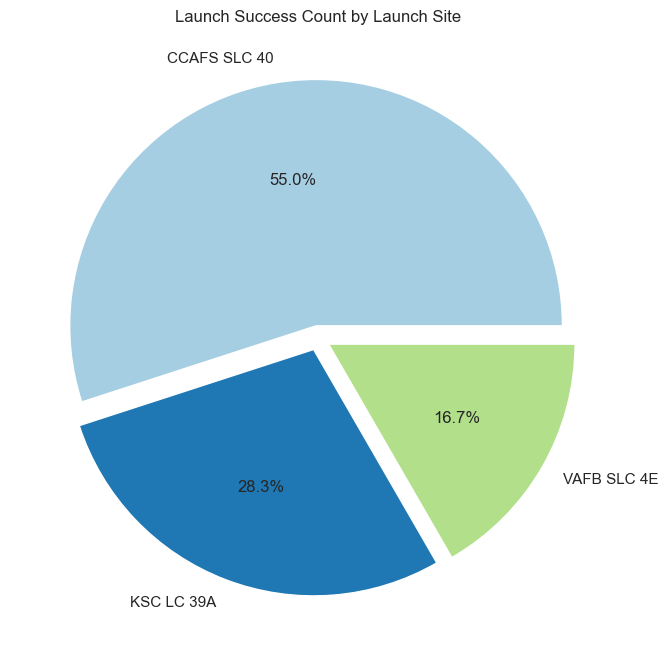

In [75]:
# Count the number of launch successes for each launch site
launch_site_success_count = df[df['Class'] == 1]['LaunchSite'].value_counts()

# Set up the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors
explode = [0.05] * len(launch_site_success_count)  # Explode the slices slightly for emphasis

# Create the pie chart
plt.pie(launch_site_success_count, labels=launch_site_success_count.index, autopct='%.1f%%', colors=colors, explode=explode)

# Set the title
plt.title("Launch Success Count by Launch Site")

# Save the pie chart as an image
plt.savefig("launch_success_piechart.png")

# Show the pie chart
plt.show()




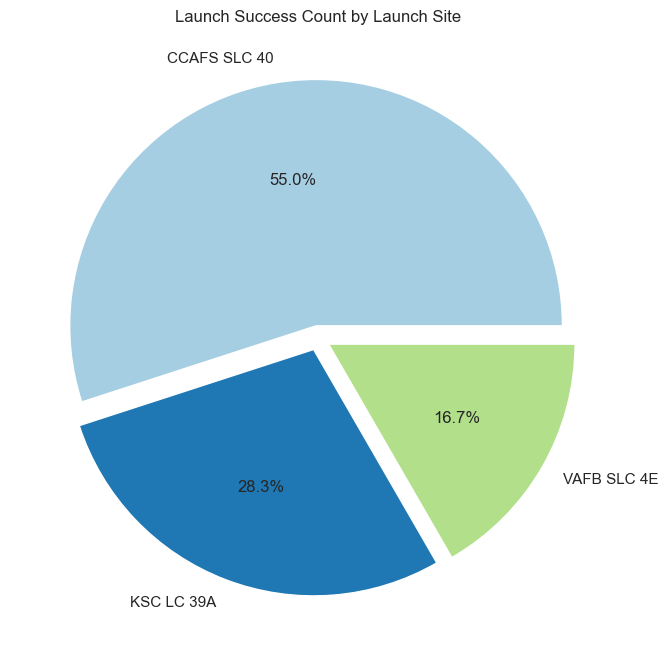

In [76]:
launch_site_success_count = df[df['Class'] == 1]['LaunchSite'].value_counts()

# Set up the pie chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Paired.colors
explode = [0.05] * len(launch_site_success_count)  # Explode the slices slightly for emphasis

# Create the pie chart
plt.pie(launch_site_success_count, labels=launch_site_success_count.index, autopct='%.1f%%', colors=colors, explode=explode)

# Set the title
plt.title("Launch Success Count by Launch Site")

# Save the pie chart as an image
plt.savefig("launch_success_piechart.png")

# Show the pie chart
plt.show()

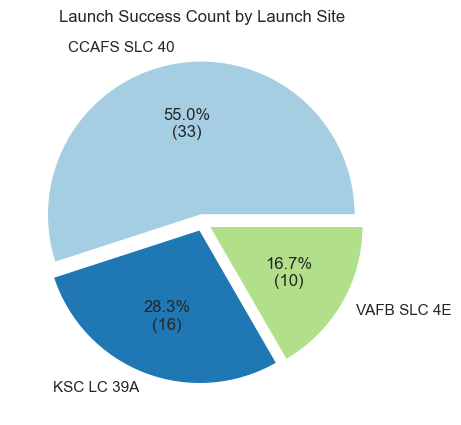

In [78]:
plt.figure(figsize=(5, 5))
colors = plt.cm.Paired.colors
explode = [0.05] * len(launch_site_success_count)  # Explode the slices slightly for emphasis

# Function to format the autopct labels
def autopct_format(pct):
    count = int(pct / 100 * sum(launch_site_success_count))
    return f'{pct:.1f}%\n({count})'

# Create the pie chart
plt.pie(launch_site_success_count, labels=launch_site_success_count.index, autopct=autopct_format, colors=colors, explode=explode)

# Set the title
plt.title("Launch Success Count by Launch Site")

# Save the pie chart as an image
plt.savefig("launch_success_piechart.png")

# Show the pie chart
plt.show()

In [79]:
max_payloads = df.groupby('BoosterVersion')['PayloadMass'].max()

# Find the booster(s) with the maximum payload mass
max_payload_boosters = max_payloads[max_payloads == max_payloads.max()]

# Print the names of boosters with maximum payload mass
print("Booster(s) with maximum payload mass:")
for booster in max_payload_boosters.index:
    print(booster)

Booster(s) with maximum payload mass:
Falcon 9


In [80]:
import pandas as pd

# Sample data for illustration
data = {
    'Class': [0, 1, 0, 1, 0],
    'BoosterVersion': ['Falcon 9']
    'LaunchSite': ['CCAFS SLC 40', 'KSC LC 39A', 'VAFB SLC 4E'],
    'Year': [12/22/2015]
}

df = pd.DataFrame(data)

# Filter the DataFrame for failed landing outcomes (Class 0) and the year 2015
failed_landings_2015 = df[(df['Class'] == 0) & (df['Year'] == 2015)]

# Print the results
for index, row in failed_landings_2015.iterrows():
    print("Booster Version:", row['BoosterVersion'])
    print("Launch Site:", row['LaunchSite'])
    print("------------------------------")


SyntaxError: invalid syntax. Perhaps you forgot a comma? (4193427702.py, line 6)

In [81]:
unique_boosters = df['BoosterVersion'].unique()

# Filter the DataFrame for boosters with successful landing outcomes, payload mass between 4000 and 6000
filtered_boosters = df[(df['LandingPad'] == 'Success') & (df['PayloadMass'] > 4000) & (df['PayloadMass'] < 6000)]

# Count the occurrences of each booster
booster_counts = filtered_boosters['BoosterVersion'].value_counts()

# Count the total number of boosters
total_boosters = len(unique_boosters)

# Print the number of total unique boosters
print("Total number of unique boosters:", total_boosters)

# Print the booster names along with their respective counts
print("\nCount of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:")
print(booster_counts)

Total number of unique boosters: 1

Count of boosters that successfully landed on drone ship with payload mass between 4000 and 6000:
Series([], Name: BoosterVersion, dtype: int64)


In [82]:
df.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [83]:
df['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [84]:
df_success= df[df['Class']==1]

In [85]:
df_fail= df[df['Class']!=1]

In [86]:
df_success.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 6 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    60 non-null     int64         
 1   Date            60 non-null     datetime64[ns]
 2   BoosterVersion  60 non-null     object        
 3   PayloadMass     60 non-null     float64       
 4   Orbit           60 non-null     object        
 5   LaunchSite      60 non-null     object        
 6   Outcome         60 non-null     object        
 7   Flights         60 non-null     int64         
 8   GridFins        60 non-null     bool          
 9   Reused          60 non-null     bool          
 10  Legs            60 non-null     bool          
 11  LandingPad      55 non-null     object        
 12  Block           60 non-null     int64         
 13  ReusedCount     60 non-null     int64         
 14  Serial          60 non-null     object        
 15  Longitud

## just for seeing correlation code, it is not usable here

C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2228464707.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)


<Axes: >

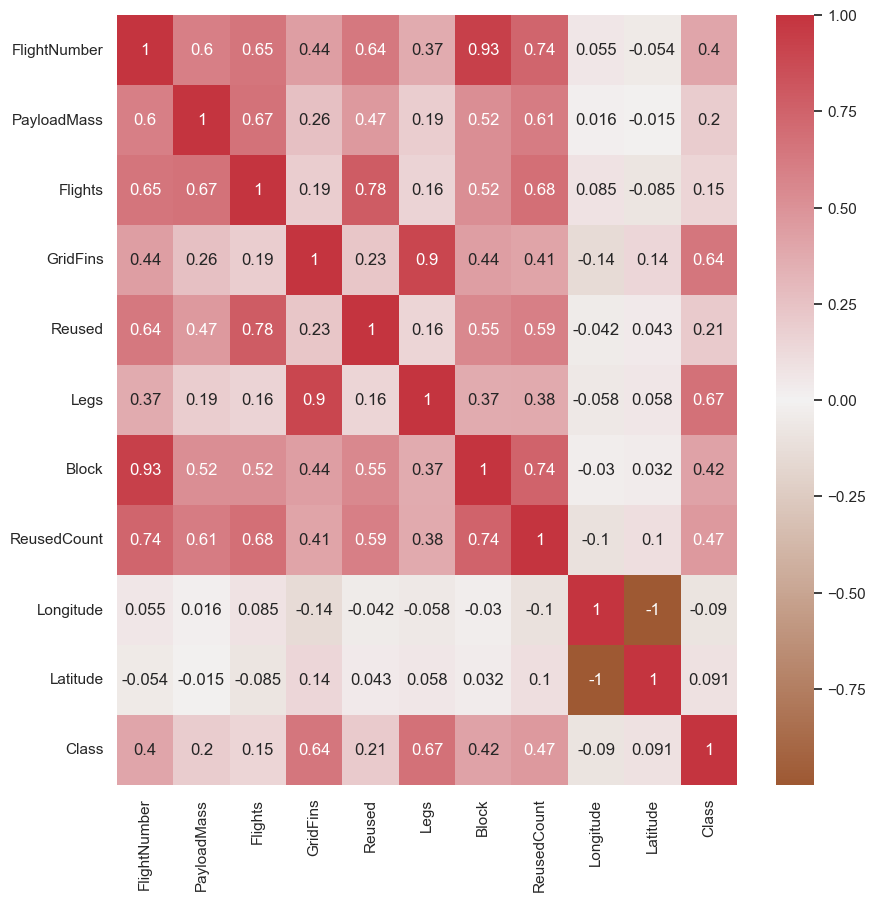

In [87]:
colors = sns.diverging_palette(30, 10, l=45, center="light", as_cmap=True)

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap=colors, center=0)

In [88]:
df_num = df.select_dtypes(include=['int64', 'float64'])

In [89]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FlightNumber  90 non-null     int64  
 1   PayloadMass   90 non-null     float64
 2   Flights       90 non-null     int64  
 3   Block         90 non-null     int64  
 4   ReusedCount   90 non-null     int64  
 5   Longitude     90 non-null     float64
 6   Latitude      90 non-null     float64
 7   Class         90 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.8 KB


In [90]:
df_num['FlightNumber'].value_counts()

1     1
68    1
66    1
65    1
64    1
     ..
29    1
28    1
27    1
26    1
90    1
Name: FlightNumber, Length: 90, dtype: int64

In [91]:
df_num['PayloadMass'].value_counts()

15400.000000    10
9600.000000      7
6104.959412      5
15600.000000     3
4230.000000      1
                ..
6070.000000      1
2708.000000      1
3669.000000      1
6761.000000      1
3681.000000      1
Name: PayloadMass, Length: 69, dtype: int64

In [92]:
df_num['Flights'].value_counts()

1    53
2    19
3     8
4     6
5     2
6     2
Name: Flights, dtype: int64

In [93]:
df_num['Block'].value_counts()

5    39
1    19
3    15
4    11
2     6
Name: Block, dtype: int64

In [94]:
df_num['ReusedCount'].value_counts()

0    30
1    24
3    12
5    11
2     9
4     4
Name: ReusedCount, dtype: int64

In [95]:
df_num['Longitude'].value_counts()

-80.577366     55
-80.603956     22
-120.610829    13
Name: Longitude, dtype: int64

In [96]:
df_num['Latitude'].value_counts()

28.561857    55
28.608058    22
34.632093    13
Name: Latitude, dtype: int64

In [97]:
df_num.drop(['Latitude'], axis=1,inplace=True)

In [98]:
df_num.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,1,6104.959412,1,1,0,-80.577366,0
1,2,525.000000,1,1,0,-80.577366,0
2,3,677.000000,1,1,0,-80.577366,0
3,4,500.000000,1,1,0,-120.610829,0
4,5,3170.000000,1,1,0,-80.577366,0


In [99]:
df_num['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [100]:
df_num.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,1,6104.959412,1,1,0,-80.577366,0
1,2,525.000000,1,1,0,-80.577366,0
2,3,677.000000,1,1,0,-80.577366,0
3,4,500.000000,1,1,0,-120.610829,0
4,5,3170.000000,1,1,0,-80.577366,0


array([[<Axes: title={'center': 'FlightNumber'}>,
        <Axes: title={'center': 'PayloadMass'}>,
        <Axes: title={'center': 'Flights'}>],
       [<Axes: title={'center': 'Block'}>,
        <Axes: title={'center': 'ReusedCount'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Class'}>, <Axes: >, <Axes: >]],
      dtype=object)

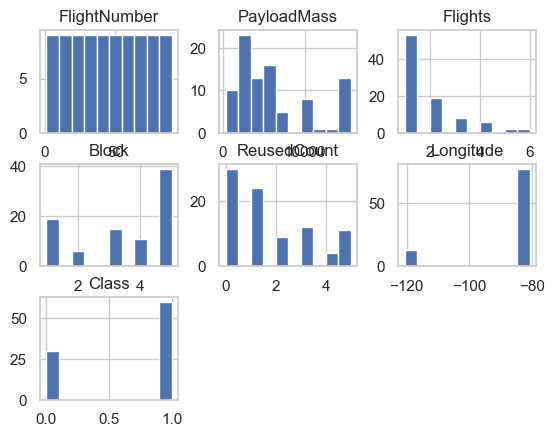

In [101]:
df_num.hist()

In [102]:
df_num.columns

Index(['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount',
       'Longitude', 'Class'],
      dtype='object')

## check how to normalize it, is this normal????

In [103]:
df_num['Class']

0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: Class, Length: 90, dtype: int64

# This is unblanced data
## For this purpose over sampling process has been done 

## Doing standardization for whole df_num (but it was not done for Class

In [104]:
from sklearn.preprocessing import StandardScaler

# List of columns to exclude from standardization
exclude_columns = ['Class']

# Filter out the columns for standardization
columns_to_standardize = [col for col in df_num.columns if col not in exclude_columns]

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the selected columns
df_num[columns_to_standardize] = scaler.fit_transform(df_num[columns_to_standardize])


In [105]:
df_num[columns_to_standardize]

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude
0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430
...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430


In [106]:
# Concatenate the standardized numerical columns with the 'Class' column
df_num_standardized = pd.concat([df_num[columns_to_standardize], df_num['Class']], axis=1)


In [107]:
df_num_standardized

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...
85,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


# Here string was seperated from the df_num

In [108]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   FlightNumber    90 non-null     int64         
 1   Date            90 non-null     datetime64[ns]
 2   BoosterVersion  90 non-null     object        
 3   PayloadMass     90 non-null     float64       
 4   Orbit           90 non-null     object        
 5   LaunchSite      90 non-null     object        
 6   Outcome         90 non-null     object        
 7   Flights         90 non-null     int64         
 8   GridFins        90 non-null     bool          
 9   Reused          90 non-null     bool          
 10  Legs            90 non-null     bool          
 11  LandingPad      64 non-null     object        
 12  Block           90 non-null     int64         
 13  ReusedCount     90 non-null     int64         
 14  Serial          90 non-null     object        
 15  Longitud

In [109]:
df_string=df[['Date','BoosterVersion','Orbit','LaunchSite','Outcome','GridFins','Reused','Legs', 'LandingPad','Serial']]

In [110]:
df_string.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            90 non-null     datetime64[ns]
 1   BoosterVersion  90 non-null     object        
 2   Orbit           90 non-null     object        
 3   LaunchSite      90 non-null     object        
 4   Outcome         90 non-null     object        
 5   GridFins        90 non-null     bool          
 6   Reused          90 non-null     bool          
 7   Legs            90 non-null     bool          
 8   LandingPad      64 non-null     object        
 9   Serial          90 non-null     object        
dtypes: bool(3), datetime64[ns](1), object(6)
memory usage: 5.3+ KB


In [111]:
df_string.columns

Index(['Date', 'BoosterVersion', 'Orbit', 'LaunchSite', 'Outcome', 'GridFins',
       'Reused', 'Legs', 'LandingPad', 'Serial'],
      dtype='object')

In [112]:
df_string['BoosterVersion'].value_counts()

Falcon 9    90
Name: BoosterVersion, dtype: int64

In [113]:
df_string.drop(columns=['BoosterVersion'], axis=1, inplace=True)
df_string

C:\Users\shari\AppData\Local\Temp\ipykernel_27640\3157683716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(columns=['BoosterVersion'], axis=1, inplace=True)


,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,2010-06-04,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,2012-05-22,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,2013-03-01,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,2013-09-29,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,2013-12-03,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...,...
85,2020-09-03,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,2020-10-06,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,2020-10-18,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,2020-10-24,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


# Date need to be changed to the Integer values (need to be droped we do not need it)

# df_string['Date'].value_counts()

# Convert 'Date' column to datetime format
df_string['Date'] = pd.to_datetime(df_string['Date'], format='%m/%d/%Y')

# Convert datetime values to Unix timestamp format (seconds since 1970-01-01)
df_string['Date'] = (df_string['Date'] - pd.Timestamp('1970-01-01')) // pd.Timedelta('1s')

# Display the updated DataFrame
print(df_string['Date'].value_counts())



In [114]:
df_string

,Date,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,2010-06-04,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,2012-05-22,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,2013-03-01,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,2013-09-29,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,2013-12-03,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...,...
85,2020-09-03,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,2020-10-06,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,2020-10-18,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,2020-10-24,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


In [115]:
# Drop the 'Date' column from df_string
df_string.drop(columns=['Date'], axis=1, inplace=True)
df_string


C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2382011314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(columns=['Date'], axis=1, inplace=True)


,Orbit,LaunchSite,Outcome,GridFins,Reused,Legs,LandingPad,Serial
0,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0003
1,LEO,CCAFS SLC 40,None None,False,False,False,NaN,B0005
2,ISS,CCAFS SLC 40,None None,False,False,False,NaN,B0007
3,PO,VAFB SLC 4E,False Ocean,False,False,False,NaN,B1003
4,GTO,CCAFS SLC 40,None None,False,False,False,NaN,B1004
...,...,...,...,...,...,...,...,...
85,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1060
86,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1058
87,VLEO,KSC LC 39A,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca,B1051
88,VLEO,CCAFS SLC 40,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc,B1060


In [116]:
df_string['GridFins'].value_counts()

True     70
False    20
Name: GridFins, dtype: int64

In [117]:
df_string['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [118]:
df_string['LaunchSite'].value_counts()   #same with latitude and longtitude

CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64

In [119]:
df_string.drop(['LaunchSite'], axis=1,inplace=True)

C:\Users\shari\AppData\Local\Temp\ipykernel_27640\3066957232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(['LaunchSite'], axis=1,inplace=True)


In [120]:
df_string['Legs'].value_counts()   #Boolean

True     71
False    19
Name: Legs, dtype: int64

In [121]:
df_string['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [122]:
df_string['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [123]:
df_string['Reused'].value_counts()

False    53
True     37
Name: Reused, dtype: int64

In [124]:
df_string['Serial'].value_counts()

B1049    6
B1051    5
B1059    4
B1056    4
B1048    4
B1046    4
B1060    3
B1058    3
B1047    3
B1031    2
B1036    2
B1021    2
B1039    2
B1035    2
B1041    2
B1029    2
B1040    2
B1045    2
B1032    2
B1042    1
B1043    1
B1038    1
B1044    1
B1037    1
B1050    1
B1054    1
B1034    1
B0003    1
B1030    1
B1013    1
B0007    1
B1003    1
B1004    1
B1005    1
B1006    1
B1007    1
B1008    1
B1011    1
B1010    1
B1012    1
B1015    1
B0005    1
B1016    1
B1018    1
B1019    1
B1017    1
B1020    1
B1022    1
B1023    1
B1025    1
B1026    1
B1028    1
B1062    1
Name: Serial, dtype: int64

In [125]:
df_string.drop(['Serial'], axis=1, inplace=True)
df_string

C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2819143009.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string.drop(['Serial'], axis=1, inplace=True)


,Orbit,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,None None,False,False,False,NaN
1,LEO,None None,False,False,False,NaN
2,ISS,None None,False,False,False,NaN
3,PO,False Ocean,False,False,False,NaN
4,GTO,None None,False,False,False,NaN
...,...,...,...,...,...,...
85,VLEO,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
86,VLEO,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
87,VLEO,True ASDS,True,True,True,5e9e3032383ecb6bb234e7ca
88,VLEO,True ASDS,True,True,True,5e9e3033383ecbb9e534e7cc


# Change the boolean to integer

In [126]:
df_string['Legs'] = df_string['Legs'].astype(int)
df_string['Reused'] = df_string['Reused'].astype(int)
df_string['GridFins'] = df_string['GridFins'].astype(int)



C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2612552314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string['Legs'] = df_string['Legs'].astype(int)
C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2612552314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_string['Reused'] = df_string['Reused'].astype(int)
C:\Users\shari\AppData\Local\Temp\ipykernel_27640\2612552314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

In [127]:
df_string

,Orbit,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,None None,0,0,0,NaN
1,LEO,None None,0,0,0,NaN
2,ISS,None None,0,0,0,NaN
3,PO,False Ocean,0,0,0,NaN
4,GTO,None None,0,0,0,NaN
...,...,...,...,...,...,...
85,VLEO,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
86,VLEO,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
87,VLEO,True ASDS,1,1,1,5e9e3032383ecb6bb234e7ca
88,VLEO,True ASDS,1,1,1,5e9e3033383ecbb9e534e7cc


In [128]:
df_string['LandingPad'].value_counts()

5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64

In [129]:
df_landingpad=df_string[df_string['LandingPad']=='5e9e3032383ecb6bb234e7ca']
set(df_landingpad['Orbit'])

{'GTO', 'HEO', 'ISS', 'MEO', 'VLEO'}

In [130]:
df_string[['LandingPad','Orbit']]

,LandingPad,Orbit
0,NaN,LEO
1,NaN,LEO
2,NaN,ISS
3,NaN,PO
4,NaN,GTO
...,...,...
85,5e9e3032383ecb6bb234e7ca,VLEO
86,5e9e3032383ecb6bb234e7ca,VLEO
87,5e9e3032383ecb6bb234e7ca,VLEO
88,5e9e3033383ecbb9e534e7cc,VLEO


In [131]:
df_string.head()

,Orbit,Outcome,GridFins,Reused,Legs,LandingPad
0,LEO,None None,0,0,0,NaN
1,LEO,None None,0,0,0,NaN
2,ISS,None None,0,0,0,NaN
3,PO,False Ocean,0,0,0,NaN
4,GTO,None None,0,0,0,NaN


In [132]:
df_dummy=pd.get_dummies(df_string[['Orbit','Outcome','LandingPad']])

In [133]:
df_dummy

,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,...,Outcome_None ASDS,Outcome_None None,Outcome_True ASDS,Outcome_True Ocean,Outcome_True RTLS,LandingPad_5e9e3032383ecb267a34e7c7,LandingPad_5e9e3032383ecb554034e7c9,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc
0,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
86,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
87,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
88,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [134]:
df_string=df_string.drop(['Orbit','Outcome','LandingPad'],axis=1)


In [135]:
df_string

,GridFins,Reused,Legs
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
85,1,1,1
86,1,1,1
87,1,1,1
88,1,1,1


In [136]:
#df_string.columns

In [137]:
# 'LandingPad', 'Latitude', 'LaunchSite', , 'Orbit','Outcome',

In [138]:
# Concatenate df_string and df_num
df_preprocessed = pd.concat([df_string,df_dummy, df_num], axis=1)

# Display the concatenated DataFrame
df_preprocessed


,GridFins,Reused,Legs,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


In [139]:
df_preprocessed.columns


Index(['GridFins', 'Reused', 'Legs', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'Outcome_False ASDS',
       'Outcome_False Ocean', 'Outcome_False RTLS', 'Outcome_None ASDS',
       'Outcome_None None', 'Outcome_True ASDS', 'Outcome_True Ocean',
       'Outcome_True RTLS', 'LandingPad_5e9e3032383ecb267a34e7c7',
       'LandingPad_5e9e3032383ecb554034e7c9',
       'LandingPad_5e9e3032383ecb6bb234e7ca',
       'LandingPad_5e9e3032383ecb761634e7cb',
       'LandingPad_5e9e3033383ecbb9e534e7cc', 'FlightNumber', 'PayloadMass',
       'Flights', 'Block', 'ReusedCount', 'Longitude', 'Class'],
      dtype='object')

In [140]:
# Loop through each column and count unique values
for column in df_string.columns:
    counts = df_string[column].value_counts()
    print(f"Column: {column}\n{counts}\n")


Column: GridFins
1    70
0    20
Name: GridFins, dtype: int64

Column: Reused
0    53
1    37
Name: Reused, dtype: int64

Column: Legs
1    71
0    19
Name: Legs, dtype: int64



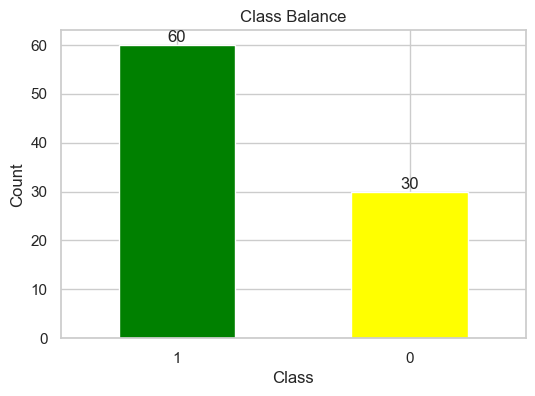

In [141]:
class_balance = df_preprocessed["Class"].value_counts()

# Plot the class balance as a bar chart
plt.figure(figsize=(6, 4))
class_balance.plot(kind='bar', color=['green', 'yellow'])
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.xticks(rotation=0)

# Annotate the bars with their counts
for i, v in enumerate(class_balance):
    plt.text(i, v, str(v), ha='center', va='bottom')

In [142]:
df_preprocessed

,GridFins,Reused,Legs,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,Orbit_LEO,Orbit_MEO,...,LandingPad_5e9e3032383ecb6bb234e7ca,LandingPad_5e9e3032383ecb761634e7cb,LandingPad_5e9e3033383ecbb9e534e7cc,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Longitude,Class
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.712912,4.759999e-11,-0.653913,-1.575895,-0.973440,0.411430,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-1.674419,-1.195232e+00,-0.653913,-1.575895,-0.973440,0.411430,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,-1.635927,-1.162673e+00,-0.653913,-1.575895,-0.973440,0.411430,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,-1.597434,-1.200587e+00,-0.653913,-1.575895,-0.973440,-2.433736,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,-1.558942,-6.286706e-01,-0.653913,-1.575895,-0.973440,0.411430,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.558942,1.991005e+00,0.174991,0.945537,0.202528,0.409541,1
86,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.597434,1.991005e+00,1.003894,0.945537,0.202528,0.409541,1
87,1,1,1,0,0,0,0,0,0,0,...,1,0,0,1.635927,1.991005e+00,3.490605,0.945537,1.966480,0.409541,1
88,1,1,1,0,0,0,0,0,0,0,...,0,0,1,1.674419,1.991005e+00,1.003894,0.945537,0.202528,0.411430,1


In [143]:
df_preprocessed['Class'].value_counts()

1    60
0    30
Name: Class, dtype: int64

In [ ]:
sns.countplot(x='LaunchSite', data=df)

In [ ]:
df_preprocessed.to_csv('df_preprocessed.csv')

In [ ]:
df_preprocessed